In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%run './spectraparser.py'

# Barcodes distribution

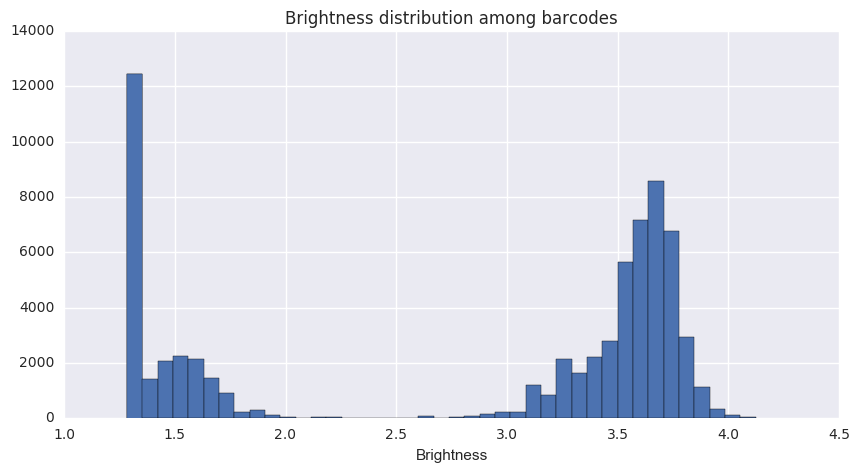

In [8]:
barcodes = pd.DataFrame.from_csv('/Users/katya/MSc/ADS/GFP/barcodes_to_brightness.tsv', sep = '\t')
plot_better()
plt.hist(barcodes.brightness, bins = 41)
plt.title('Brightness distribution among barcodes')
plt.xlabel('Brightness');

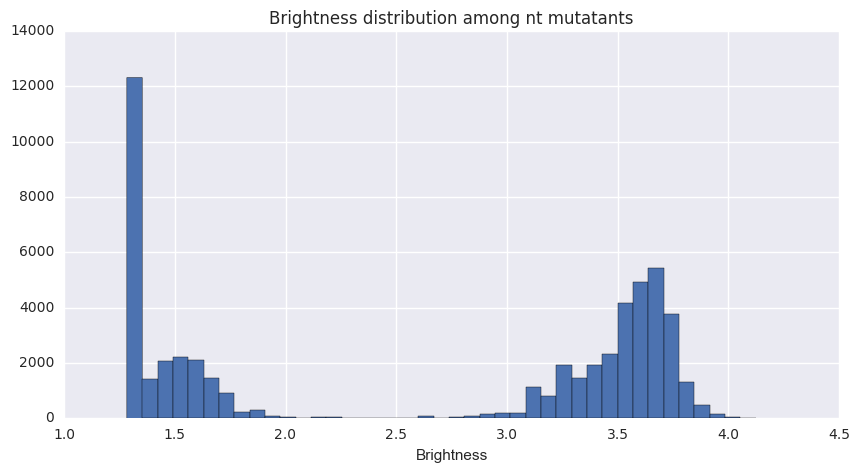

In [11]:
nt = barcodes.groupby(by = 'nMutations').median()
plot_better()
plt.hist(aa.brightness, bins = 41)
plt.title('Brightness distribution among nt mutatants')
plt.xlabel('Brightness');

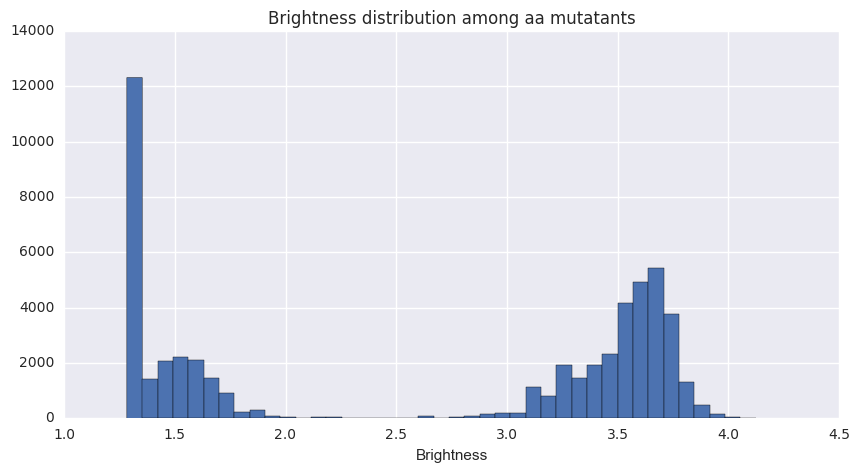

In [10]:
aa = barcodes.groupby(by = 'aaMutations').median()
plot_better()
plt.hist(aa.brightness, bins = 41)
plt.title('Brightness distribution among aa mutatants')
plt.xlabel('Brightness');

# Mutations distribution in the protein sequence

In [12]:
by_aa = pd.read_table('/Users/katya/MSc/ADS/GFP/amino_acid_genotypes_to_brightness.tsv')
by_aa.aaMutations.fillna('', inplace=True)
unique_mutations = set(':'.join(by_aa.aaMutations.values).split(':'))
unique_mutations.remove('')
positions = [int(m[2:-1]) for m in unique_mutations if m != '']

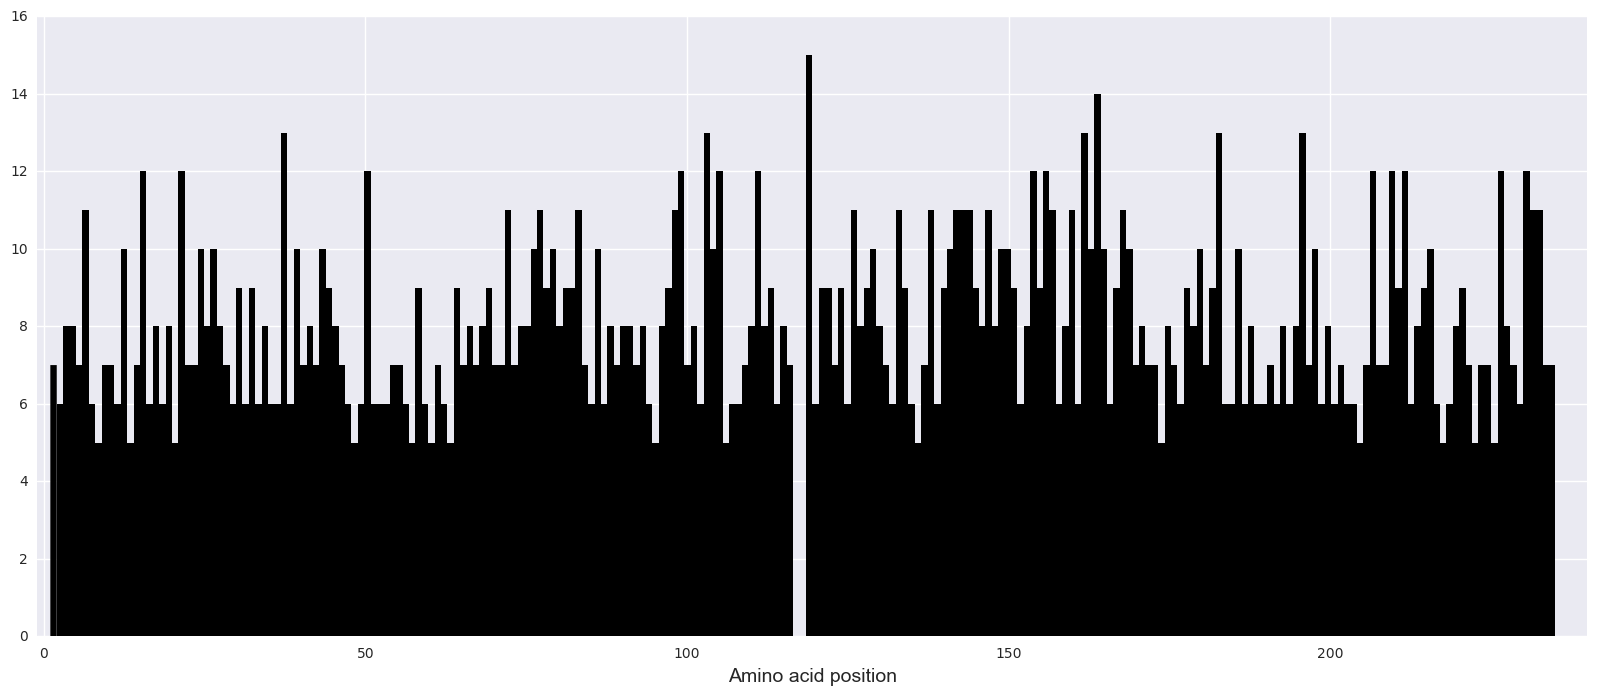

In [13]:
plot_better(width=20, height=8)
plt.hist(positions, bins=max(positions), edgecolor='none', color='black');
plt.xlim(-1, 240)
plt.xlabel('Amino acid position', fontsize=14);

# Aminoacid switches

In [14]:
aa = list("ACDEFGHIKLMNPQRSTVWYX*")
aa2aa = pd.DataFrame(columns=aa, index=aa).fillna(0)
for m in unique_mutations:
    aa2aa[m[-1]].ix[m[1]] += 1

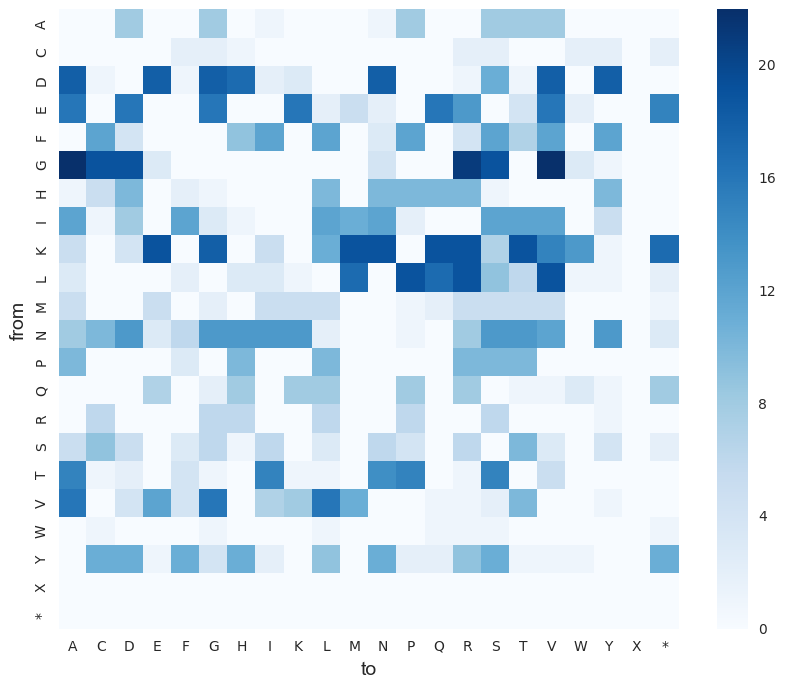

In [15]:
import seaborn as sns
plt.figure(figsize = [10,8])
sns.heatmap(aa2aa, cmap='Blues')
plt.xlabel('to', fontsize=14)
plt.ylabel('from', fontsize=14);

# Number of unique mutations in different types of mutants

1115
1393


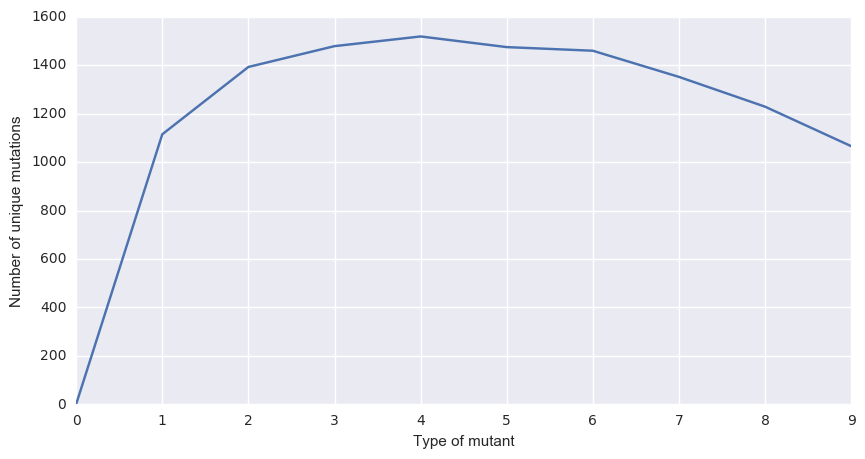

In [16]:
by_aa = pd.read_table('/Users/katya/MSc/ADS/GFP/amino_acid_genotypes_to_brightness.tsv')
by_aa.aaMutations.fillna('', inplace=True)
by_aa['mut_number'] = by_aa.aaMutations.apply(lambda x: x.count(':') + 1)
singles = by_aa[by_aa.mut_number == 1]
doubles = by_aa[by_aa.mut_number == 2]
unique_mutations_in_doubles = set(':'.join(doubles.aaMutations.values).split(':'))
print len(singles)
print len(unique_mutations_in_doubles)

uniques = []
for i in range(10):
    subset = by_aa[by_aa.mut_number == i]
    uniques.append(len(set(':'.join(subset.aaMutations.values).split(':'))))

plot_better()
plt.plot(range(10), uniques)
plt.xlabel('Type of mutant')
plt.ylabel('Number of unique mutations');

# Brightness distribution among singles/double/triplets, etc

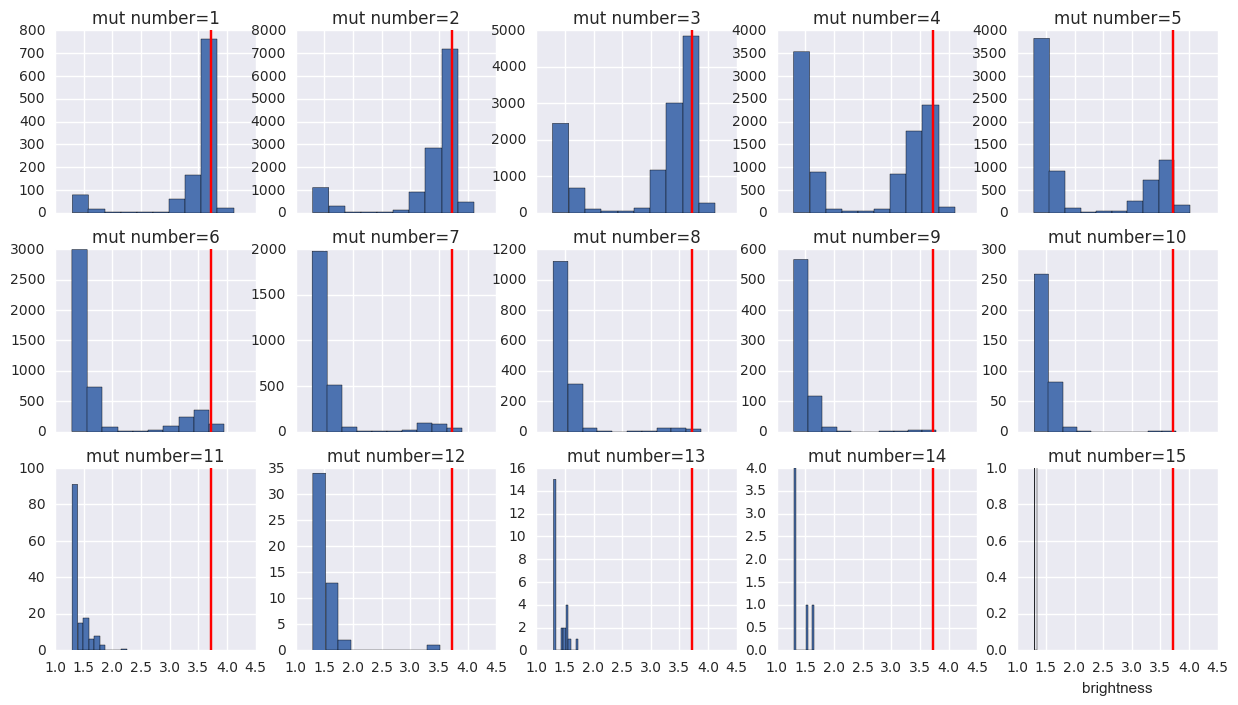

In [23]:
bright_arr = by_aa['medianBrightness'].drop(0).values
mutants = by_aa['aaMutations']       #split to list of aminoacids
mutants = mutants.str.split(':')
mut_len = np.zeros(len(mutants))  #start from index 1 to drop the first NaN
for i in xrange(1,mutants.shape[0]):
    mut_len[i]=len(mutants[i])
mut_len = mut_len[1:]

fig, axs = plt.subplots(3,5, figsize=(15, 8), sharex=True)
fig.subplots_adjust(hspace = .2, wspace=.2)

axs = axs.ravel()

for i in xrange(15):

    axs[i].hist(bright_arr[np.where(mut_len==i+1)])
    axs[i].grid(True)
    axs[i].set_title('mut number='+str(i+1))
    axs[i].axvline(x = 3.72, ymin = 0, ymax = 1, color = 'r') # wild value
    
plt.xlabel('brightness')
plt.show()